In [700]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [701]:
movies=pd.read_csv('movies.csv')
credits= pd.read_csv('credits.csv')

In [702]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [703]:
#credit.head(1)['crew'].values
credits.head(1)
#cast: all the actors in the movie
#crew: director, writer, editor, producer etc

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


## MERGE THE TWO DATASETS

In [704]:
#merge the dataframes based on title(any common cloumn)
movies.merge(credits, on='title').shape

(4809, 23)

In [705]:
credits.shape
#movies.shape=> (4803, 20)

(4803, 4)

In [706]:
# title common in both datasets, hence 23 columns

movies=movies.merge(credits, on='title')

In [707]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


# DATA PROCESSING

#### we are making a content based recommender system, which uses tags, therefore while selecting useful columns think in terms of : can i create a tag from this
 

##### 1: Budget: Not needed in recommendation, budget cant predict if i will like a movie or not

##### 2: Genre is imp for recommending

##### 3:id imp for posters for websites
##### 4: keywords are tags


In [708]:
movies['original_language'].value_counts()

original_language
en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

##### 5: original language: mostly english, hence not useful

##### 6: title: keep(always in english)
##### 7: og title: remove(in different langauge, can create problems)

##### 8: overview keep: since if summary similiar, then movie similiar and can be recommended

##### 9: popularity and production house not important

In [709]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

##### 10: release date: people do have era preferences, hence useful , but is a numeric, we will drop it for now


##### 11:revenue, runtime, spoken lang, status of release, tagline(covered in overview), vote avg/count ,movie id not recquired, since we are already using id, 

##### title, cast, crew(actor/director preference) is imp, we well use them.

# useful columns:


In [710]:
# genre
# id
# keywords
# title
# overview
# cast
# crew
#release_date
#popularity
#id
#original language


In [711]:
movies = movies[['movie_id', 'title','overview','genres','keywords','cast','crew','original_language','popularity','release_date']]

In [712]:
movies.head(1)
# below is the main dataframe

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,150.437577,2009-12-10


In [713]:
# we just want movie id, title and tags(3 column)

In [714]:
# checking for missing data

In [715]:
movies.isnull().sum()

movie_id             0
title                0
overview             3
genres               0
keywords             0
cast                 0
crew                 0
original_language    0
popularity           0
release_date         1
dtype: int64

In [716]:
# overview is imp, missing values issues need to be fixed

In [717]:
movies.dropna(inplace = True)

In [718]:
movies.isnull().sum()


movie_id             0
title                0
overview             0
genres               0
keywords             0
cast                 0
crew                 0
original_language    0
popularity           0
release_date         0
dtype: int64

In [719]:
# check for duplicate

In [720]:
movies.duplicated().sum()

0

In [721]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [722]:
# form recquired: list of dic that can be traversed
# current form: string

In [723]:
#convert('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')
#gave error: string indices must be integers, not 'str'

In [724]:
# list conversion recquired

In [725]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [726]:
def convert(obj):
    L= []
    for i in ast.literal_eval(obj): 
        L.append(i['name'])
    return L

In [727]:
movies['genres'] = movies['genres'].apply(convert)

In [728]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en,43.926995,2012-03-07


In [729]:
movies['keywords']= movies['keywords'].apply(convert)

In [730]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en,43.926995,2012-03-07


In [731]:
# from cast, we only want the first three actors

In [732]:
#{} => dictionary 

In [733]:
def convert3(obj):
    L= []
    counter = 0
    for i in ast.literal_eval(obj): 
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
             break
        
    return L

In [734]:
movies['cast'] = movies['cast'].apply(convert3)

In [735]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en,43.926995,2012-03-07


In [736]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [737]:
# we need the name of the dictionary having department as direction

In [738]:
def fetch_director(obj):
    L= []
    for i in ast.literal_eval(obj): 
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [739]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [740]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],en,139.082615,2007-05-19
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],en,112.312950,2012-07-16
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],en,43.926995,2012-03-07


In [741]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [742]:
#overview column is a string, we need list so that concatenation with other lists can take place 


In [743]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())

In [744]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],en,139.082615,2007-05-19
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],en,112.312950,2012-07-16
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],en,43.926995,2012-03-07


In [745]:
# now, lets concatenate the list, and then we want a para as tag column
#problem: we want to remove spacses from strings in our list
#why: => with space two different tags are created 

In [746]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [747]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],en,150.437577,2009-12-10
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],en,139.082615,2007-05-19
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],en,107.376788,2015-10-26
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],en,112.312950,2012-07-16
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],en,43.926995,2012-03-07


In [748]:
# converting popularity into tags

In [749]:
pop_min = movies["popularity"].min()
pop_max = movies["popularity"].max()
print(pop_min)
print(pop_max)

0.000372
875.581305


In [750]:
th1 = 300
th2 = 600

In [751]:
# 3. Define a function that returns a single‐element list tag based on these thresholds
def to_popularity_list(pop):
    if pop > th2:
        return ["highpopular"]
    elif pop > th1:
        return ["averagepopular"]
    else:
        return ["lowpopular"]

# 4. Apply this function to create a new column "popularity_tag"
movies["popularity"] = movies["popularity"].apply(to_popularity_list)

In [752]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],en,[lowpopular],2009-12-10
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],en,[lowpopular],2007-05-19
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],en,[lowpopular],2015-10-26
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],en,[lowpopular],2012-07-16
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],en,[lowpopular],2012-03-07


In [753]:
#converting language to tag

In [754]:
unique_langs = movies["original_language"].unique()
print("Unique original_language codes:", unique_langs)

Unique original_language codes: ['en' 'ja' 'fr' 'zh' 'es' 'ko' 'de' 'hi' 'ru' 'te' 'cn' 'it' 'nl' 'ta'
 'sv' 'th' 'da' 'xx' 'hu' 'cs' 'pt' 'is' 'tr' 'nb' 'af' 'pl' 'he' 'ar'
 'vi' 'ky' 'id' 'ro' 'fa' 'no' 'sl' 'ps' 'el']


In [755]:
movies["language_og"] = movies["original_language"].apply(lambda code: [f"{code}language"])

In [756]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date,language_og
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],en,[lowpopular],2009-12-10,[enlanguage]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],en,[lowpopular],2007-05-19,[enlanguage]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],en,[lowpopular],2015-10-26,[enlanguage]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],en,[lowpopular],2012-07-16,[enlanguage]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],en,[lowpopular],2012-03-07,[enlanguage]


In [757]:
#converting date to tags

In [758]:
def to_decade_era(date_str):
    try:
        year = int(date_str.split("-")[0])
    except Exception:
        return ["unknownera"]
    
    # Compute the decade start (e.g. 2019 → 2010, 2025 → 2020)
    decade = (year // 10) * 10
    return [f"{decade}era"]

# Apply the function to create a new column "era_tag"
movies["era"] = movies["release_date"].apply(to_decade_era)

In [759]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,original_language,popularity,release_date,language_og,era
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],en,[lowpopular],2009-12-10,[enlanguage],[2000era]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],en,[lowpopular],2007-05-19,[enlanguage],[2000era]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],en,[lowpopular],2015-10-26,[enlanguage],[2010era]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],en,[lowpopular],2012-07-16,[enlanguage],[2010era]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],en,[lowpopular],2012-03-07,[enlanguage],[2010era]


In [760]:
movies = movies[['movie_id', 'title','overview','genres','keywords','cast','crew','language_og','popularity','era']]

In [761]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,language_og,popularity,era
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],[enlanguage],[lowpopular],[2000era]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],[enlanguage],[lowpopular],[2000era]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],[enlanguage],[lowpopular],[2010era]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],[enlanguage],[lowpopular],[2010era]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],[enlanguage],[lowpopular],[2010era]


In [762]:
# concatenate
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [763]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,language_og,popularity,era,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],[enlanguage],[lowpopular],[2000era],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],[enlanguage],[lowpopular],[2000era],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],[enlanguage],[lowpopular],[2010era],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],[enlanguage],[lowpopular],[2010era],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],[enlanguage],[lowpopular],[2010era],"[John, Carter, is, a, war-weary,, former, mili..."


In [764]:
# remove other columns

In [765]:
new_df = movies[['movie_id', 'title', 'tags','genres', 'language_og', 'popularity', 'era']]

In [766]:
new_df

,movie_id,title,tags,genres,language_og,popularity,era
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]",[enlanguage],[lowpopular],[2000era]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]",[enlanguage],[lowpopular],[2000era]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]",[enlanguage],[lowpopular],[2010era]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]",[enlanguage],[lowpopular],[2010era]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]",[enlanguage],[lowpopular],[2010era]
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]",[eslanguage],[lowpopular],[1990era]
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]",[enlanguage],[lowpopular],[2010era]
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TVMovie]",[enlanguage],[lowpopular],[2010era]
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[],[enlanguage],[lowpopular],[2010era]


In [767]:
pop_counts = new_df["popularity"].apply(lambda lst: lst[0]).value_counts()
print("Popularity distribution:\n", pop_counts)

Popularity distribution:
 popularity
lowpopular        4799
averagepopular       4
highpopular          2
Name: count, dtype: int64


In [768]:
lang_counts = new_df["language_og"].apply(lambda lst: lst[0]).value_counts()
print("\nLanguage distribution:\n", lang_counts)


Language distribution:
 language_og
enlanguage    4508
frlanguage      70
eslanguage      32
zhlanguage      27
delanguage      26
hilanguage      19
jalanguage      16
itlanguage      13
kolanguage      12
cnlanguage      12
rulanguage      11
ptlanguage       9
dalanguage       7
svlanguage       5
nllanguage       4
falanguage       4
thlanguage       3
helanguage       3
talanguage       2
cslanguage       2
rolanguage       2
idlanguage       2
arlanguage       2
vilanguage       1
sllanguage       1
pslanguage       1
nolanguage       1
kylanguage       1
hulanguage       1
pllanguage       1
aflanguage       1
nblanguage       1
trlanguage       1
islanguage       1
xxlanguage       1
telanguage       1
ellanguage       1
Name: count, dtype: int64


In [769]:
era_counts = new_df["era"].apply(lambda lst: lst[0]).value_counts()
print("\nEra distribution:\n", era_counts)


Era distribution:
 era
2000era    2050
2010era    1444
1990era     778
1980era     280
1970era     109
1960era      72
1950era      27
1940era      25
1930era      15
1920era       4
1910era       1
Name: count, dtype: int64


In [770]:
new_df = movies[['movie_id', 'title', 'tags','genres']]

In [771]:
new_df

,movie_id,title,tags,genres
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]"
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]"
...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...","[Action, Crime, Thriller]"
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...","[Comedy, Romance]"
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...","[Comedy, Drama, Romance, TVMovie]"
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",[]


In [772]:
# convert the lists under tag into string

In [773]:
new_df['tags'].apply(lambda x:" ".join(x))

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4805, dtype: object

In [774]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

In [775]:
new_df.head()

,movie_id,title,tags,genres
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]"
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]"


In [776]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [777]:
#convert all letters to lower case:
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())

In [778]:
new_df.head()

,movie_id,title,tags,genres
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]"
2,206647,Spectre,a cryptic message from bond’s past sends him o...,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,following the death of district attorney harve...,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"john carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]"


In [779]:
# text vectorization: in yellow notebook

In [780]:
import nltk
#!pip install nltk 

In [781]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

In [782]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [783]:
new_df['tags'] = new_df['tags'].apply(stem)

In [784]:
ps.stem('thrilled')

'thrill'

In [785]:
ps.stem('thrilling')

'thrill'

In [786]:
stem('in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron')

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [787]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [788]:
new_df['tags'][1]

"captain barbossa, long believ to be dead, ha come back to life and is head to the edg of the earth with will turner and elizabeth swann. but noth is quit as it seems. adventur fantasi action ocean drugabus exoticisland eastindiatradingcompani loveofone'slif traitor shipwreck strongwoman ship allianc calypso afterlif fighter pirat swashbuckl aftercreditssting johnnydepp orlandobloom keiraknightley goreverbinski"

In [789]:
# GOOD CHALLENGE FOR INTERVIEW: we want to calculate the similarity score between these two movies, which deoends on the similarity between the text in the tags column

In [790]:
# how to calculate similarity score: calculate no. of common words? => not recommended

In [791]:
# we will use text vectorization: by a technique called "bag of words"
# we wont usw stop words: ie in , a , of , as etc


In [792]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [793]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [794]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [795]:
vectors.shape

(4805, 5000)

In [796]:
# 4806 movies, 5000 most popular words

In [797]:
#first movie
# concatenated string=> corpus
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [798]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [799]:
len(cv.get_feature_names_out())

5000

In [800]:
array = cv.get_feature_names_out()

In [801]:
# has abuse,actor and abusive,actors as two different words
array[20]

'1944'

In [802]:
res = array[:250]

In [803]:
res

array(['000', '007', '10', '100', '11', '12', '13', '14', '15', '16',
       '17', '17th', '18', '18th', '18thcenturi', '19', '1910', '1920',
       '1930', '1940', '1944', '1950', '1950s', '1960', '1960s', '1970',
       '1970s', '1974', '1976', '1980', '1985', '1990', '1999', '19th',
       '19thcenturi', '20', '200', '2003', '2009', '20th', '21st', '23',
       '24', '25', '30', '300', '3d', '40', '50', '500', '60', '70', '80',
       'aaron', 'aaroneckhart', 'abandon', 'abduct', 'abigailbreslin',
       'abil', 'abl', 'aboard', 'abov', 'abus', 'academ', 'academi',
       'accept', 'access', 'accid', 'accident', 'acclaim', 'accompani',
       'accomplish', 'account', 'accus', 'ace', 'achiev', 'acquaint',
       'act', 'action', 'actionhero', 'activ', 'activist', 'activities',
       'actor', 'actress', 'actual', 'ad', 'adam', 'adamsandl',
       'adamshankman', 'adapt', 'add', 'addict', 'adjust', 'admir',
       'admit', 'adolesc', 'adopt', 'ador', 'adrienbrodi', 'adult',
       'ad

In [804]:
#apply stemming: ['action', 'actions'] to ['action', 'action'] => after lowercase table

In [805]:
# 4806 movies=> 4806 vectors

In [806]:
# now, we will calculate distance between two vectors: not eucledian, but cosine distance
# higher dimensions m eucledian dist is not a good measure
#dist invprop to similarity

In [807]:
from sklearn.metrics.pairwise import cosine_similarity

In [808]:
similarity  = cosine_similarity(vectors)

In [809]:
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [810]:
similarity.shape

(4805, 4805)

In [811]:
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [812]:
#digonal of similarity always one

In [813]:
# now we will create a function that takes a movie as input and returns five most similiar movies

In [814]:
#sorted(similarity[0],reverse =True)

In [815]:
#CHALLENGE: INDEX POSITION LOST BY SORTING

In [816]:
#list(enumerate(similarity[0]))

In [817]:
sorted(list(enumerate(similarity[0])), reverse=True, key = lambda x: x[1])[1: 6]

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [818]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key = lambda x: x[1])[1: 6]

    for i in movies_list:
        movie_id = i[0]
        # fetch poster from API
        print(new_df.iloc[i[0]].title)
        

In [819]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [820]:
new_df.iloc[1216].title

'Aliens vs Predator: Requiem'

In [821]:
recommend('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [822]:
new_df.head()

,movie_id,title,tags,genres
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...","[Adventure, Fantasy, Action]"
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"john carter is a war-weary, former militari ca...","[Action, Adventure, ScienceFiction]"


##### After running this cell, you will have:

##### df_interactions: one row per user‐movie interaction (long format).

##### df_users_full: one row per user, with a ~50‐dimensional feature vector (ready for K-means, GMM, Birch, HDBSCAN, etc.).

# Creating dataset

In [823]:
# Gather every genre from the 'genres' column (which is a list of strings per row)
all_genres = set()
for genre_list in new_df["genres"]:
    all_genres.update(genre_list)

# Display the result
print("Unique genres:", all_genres)
print("Number of unique genres:", len(all_genres))

Unique genres: {'Action', 'Horror', 'Family', 'History', 'Adventure', 'Foreign', 'ScienceFiction', 'Romance', 'TVMovie', 'Documentary', 'Thriller', 'Western', 'Crime', 'Fantasy', 'War', 'Animation', 'Comedy', 'Mystery', 'Drama', 'Music'}
Number of unique genres: 20


In [824]:
# This code will produce:
#   • df_interactions: long table of simulated user–movie interactions
#   • df_users_full:   wide table, one row per user, with aggregated features
# ──────────────────────────────────────────────────────────────────────────────

In [825]:
np.random.seed(42)
# to get exact same results each time , fixes all the random values

In [826]:
# STEP 0: Extract unique genres
all_genres = sorted({g for row in new_df["genres"] for g in row}) #list of every unique genre (alphabetically ordered).
G = len(all_genres) #of unique genres
genre_to_index = {g: i for i, g in enumerate(all_genres)} #{aa:0, ab:1, ac:1} where key is genre

In [827]:
# STEP 1: Define 15 personas, each with 5 genres + Dirichlet weights
num_personas = 15
persona_genres = {}
persona_genre_weights = {}

In [828]:
for pid in range(num_personas):
    chosen = list(np.random.choice(all_genres, size=5, replace=False)) #chosen is a list of 5 genres
    persona_genres[pid] = chosen
    alpha = np.ones(len(chosen))
    weights = np.random.default_rng(42 + pid).dirichlet(alpha)
    persona_genre_weights[pid] = {chosen[i]: float(weights[i]) for i in range(len(chosen))}

In [829]:
# STEP 2: Define persona parameters (demographics & viewing habits)
apps = ["netflix", "amazon_prime", "hulu", "disney_plus", "hbo_max"]
countries = ["USA", "Canada", "UK", "Germany", "France", "Australia", "Japan", "India"]

persona_params = {}
for pid in range(num_personas):
    min_age = 18 + 2 * pid
    max_age = min_age + 5
    c_list = list(np.random.choice(countries, size=2, replace=False))
    chosen_apps = np.random.choice(apps, size=2, replace=False)
    p_app1 = np.random.uniform(0.6, 0.85)
    p_app2 = 1.0 - p_app1
    app_probs = {chosen_apps[0]: float(p_app1), chosen_apps[1]: float(p_app2)}
    base_month = np.ones(12) * 0.02
    spike_m = pid % 12
    base_month[spike_m] += 0.76
    month_probs = (base_month / base_month.sum()).tolist()
    if pid % 2 == 0:
        wd = np.array([0.05, 0.05, 0.05, 0.05, 0.20, 0.30, 0.30])
    else:
        wd = np.array([0.20, 0.20, 0.20, 0.20, 0.10, 0.05, 0.05])
    weekday_probs = (wd / wd.sum()).tolist()
    watched_ratio = np.random.uniform(0.7, 0.9)
    rating_mu = np.random.uniform(3.5, 4.5)
    rating_sigma = np.random.uniform(0.3, 0.6)

    persona_params[pid] = {
        "age_range": (min_age, max_age),
        "country_list": c_list,
        "app_probs": app_probs,
        "month_probs": month_probs,
        "weekday_probs": weekday_probs,
        "watched_ratio": float(watched_ratio),
        "rating_mu": float(rating_mu),
        "rating_sigma": float(rating_sigma)
    }


In [830]:
# STEP 3: Build genre → movie_id mapping
genre_to_movies = {g: set() for g in all_genres}
for _, row in new_df.iterrows():
    mid = row["movie_id"]
    for g in row["genres"]:
        genre_to_movies[g].add(mid)

all_movie_ids = new_df["movie_id"].tolist()

In [831]:
# STEP 4: Create users (pure, mixed, noise)
users = []
next_user_id = 0

# Pure persona users
for pid in range(num_personas):
    for _ in range(100):
        p = persona_params[pid]
        age = np.random.randint(p["age_range"][0], p["age_range"][1] + 1)
        country = np.random.choice(p["country_list"])
        users.append({
            "user_id": next_user_id,
            "persona_id": pid,
            "age": int(age),
            "country": country,
            "is_mixed": False
        })
        next_user_id += 1

# Mixed‐persona users
for _ in range(20):
    a, b = np.random.choice(num_personas, size=2, replace=False)
    pa, pb = persona_params[a], persona_params[b]
    amin, amax = pa["age_range"]
    bmin, bmax = pb["age_range"]
    age = np.random.randint(min(amin, bmin), max(amax, bmax) + 1)
    country = np.random.choice(pa["country_list"] + pb["country_list"])
    users.append({
        "user_id": next_user_id,
        "persona_id": (a, b),
        "age": int(age),
        "country": country,
        "is_mixed": True
    })
    next_user_id += 1

# Noise users
for _ in range(50):
    age = np.random.randint(18, 65)
    country = np.random.choice(countries)
    users.append({
        "user_id": next_user_id,
        "persona_id": -1,
        "age": int(age),
        "country": country,
        "is_mixed": False
    })
    next_user_id += 1

df_users_base = pd.DataFrame(users)

In [832]:
# STEP 5: Simulate interactions (store chosen_genre)
interactions = []

for _, urow in df_users_base.iterrows():
    uid = urow["user_id"]
    pid = urow["persona_id"]
    age = urow["age"]
    country = urow["country"]
    is_mixed = urow["is_mixed"]

    n_int = np.random.randint(20, 81)

    if pid == -1:
        watched_ratio = 0.5
        rating_mu, rating_sigma = 3.0, 1.0
        month_probs = [1/12.0] * 12
        weekday_probs = [1/7.0] * 7
        app_probs = {a: 1/len(apps) for a in apps}
        genres_for_user = all_genres.copy()
        genre_weights = {g: 1.0/G for g in all_genres}
    elif not is_mixed:
        p = persona_params[pid]
        watched_ratio = p["watched_ratio"]
        rating_mu, rating_sigma = p["rating_mu"], p["rating_sigma"]
        month_probs = p["month_probs"]
        weekday_probs = p["weekday_probs"]
        app_probs = p["app_probs"]
        genres_for_user = persona_genres[pid]
        genre_weights = persona_genre_weights[pid]
    else:
        a, b = pid
        pa, pb = persona_params[a], persona_params[b]
        watched_ratio = 0.5 * pa["watched_ratio"] + 0.5 * pb["watched_ratio"]
        rating_mu = 0.5 * pa["rating_mu"] + 0.5 * pb["rating_mu"]
        rating_sigma = 0.5 * pa["rating_sigma"] + 0.5 * pb["rating_sigma"]
        month_probs = (np.array(pa["month_probs"]) * 0.5 + np.array(pb["month_probs"]) * 0.5).tolist()
        month_probs = (np.array(month_probs) / sum(month_probs)).tolist()
        weekday_probs = (np.array(pa["weekday_probs"]) * 0.5 + np.array(pb["weekday_probs"]) * 0.5).tolist()
        weekday_probs = (np.array(weekday_probs) / sum(weekday_probs)).tolist()
        merged_apps = {}
        for a_k in apps:
            merged_apps[a_k] = 0.5 * pa["app_probs"].get(a_k, 0.0) + 0.5 * pb["app_probs"].get(a_k, 0.0)
        total_app = sum(merged_apps.values())
        if total_app > 0:
            for a_k in merged_apps:
                merged_apps[a_k] /= total_app
        else:
            merged_apps = {a_k: 1/len(apps) for a_k in apps}
        app_probs = merged_apps
        genres_for_user = list(set(persona_genres[a] + persona_genres[b]))
        blend = {}
        for g in genres_for_user:
            blend[g] = 0.5 * persona_genre_weights[a].get(g, 0.0) + 0.5 * persona_genre_weights[b].get(g, 0.0)
        total_blend = sum(blend.values())
        if total_blend > 0:
            for g in blend:
                blend[g] /= total_blend
        else:
            for g in blend:
                blend[g] = 1.0 / len(genres_for_user)
        genre_weights = blend

    for _ in range(n_int):
        if pid == -1 or np.random.rand() < 0.10:
            chosen_genre = np.random.choice(all_genres)
        else:
            g_list = genres_for_user
            w_list = [genre_weights[g] for g in g_list]
            w_arr = np.array(w_list) / np.sum(w_list)
            chosen_genre = np.random.choice(g_list, p=w_arr)

        candidates = list(genre_to_movies.get(chosen_genre, []))
        if not candidates:
            movie_id = np.random.choice(all_movie_ids)
        else:
            movie_id = np.random.choice(candidates)

        was_watched = (np.random.rand() < watched_ratio)
        if not was_watched:
            rating = 1
        else:
            r_raw = np.random.normal(rating_mu, rating_sigma)
            r_clamped = float(np.clip(r_raw, 3.0, 5.0))
            rating = int(round(r_clamped))

        month = np.random.choice(np.arange(1, 13), p=month_probs)
        weekday = np.random.choice(np.arange(0, 7), p=weekday_probs)

        app_keys, app_ps = zip(*app_probs.items())
        app_chosen = np.random.choice(list(app_keys), p=list(app_ps))

        interactions.append({
            "user_id": uid,
            "movie_id": movie_id,
            "chosen_genre": chosen_genre,
            "watch_flag": int(was_watched),
            "rating": int(rating),
            "month": int(month),
            "weekday": int(weekday),
            "app": app_chosen,
            "age": int(age),
            "country": country
        })

df_interactions = pd.DataFrame(interactions)

In [833]:
df_interactions

,user_id,movie_id,chosen_genre,watch_flag,rating,month,weekday,app,age,country
0,0,127867,Thriller,0,1,3,4,amazon_prime,20,Canada
1,0,22972,Action,1,5,1,4,hbo_max,20,Canada
2,0,30379,ScienceFiction,1,4,1,6,amazon_prime,20,Canada
3,0,10204,Action,1,4,1,5,amazon_prime,20,Canada
4,0,15158,Thriller,1,5,1,4,amazon_prime,20,Canada
...,...,...,...,...,...,...,...,...,...,...
78240,1569,68724,ScienceFiction,1,3,7,3,hbo_max,29,UK
78241,1569,375290,Drama,0,1,4,1,hulu,29,UK
78242,1569,27374,Horror,1,3,3,3,netflix,29,UK
78243,1569,10914,Western,1,4,9,1,amazon_prime,29,UK


# Pre-processing

In [834]:
# STEP 6: Aggregate into per‐user feature vectors

In [835]:
user_groups = df_interactions.groupby("user_id")
user_feature_list = []

In [836]:

for uid, grp in user_groups:
    # Genre fractions
    genre_counts = grp["chosen_genre"].value_counts(normalize=True).to_dict()
    genre_vec = [genre_counts.get(g, 0.0) for g in all_genres]
    
    #[0.6, 0.0, 0.2, 0.2, 0.0]: gen_vec**
    #{"Action": 0.6, "Drama": 0.2, "Comedy": 0.2}: gen_counts
    #chosen = ["Action", "SciFi", "Thriller", "Comedy", "Adventure"]
    #so chosen_genre had movies form cluster persona that the user belongs to
    #Pure users → chosen_genre ∈ persona_genres[k] (one of those 5 genres), so the movie always matches persona’s cluster‐defined genres.
    #Mixed users → chosen_genre ∈ union of persona a and persona b’s genres (weighted 50/50).
    #Noise users → chosen_genre is any genre in the catalog with equal probability.


    
    
    # pct_scrolled
    pct_scrolled = 1.0 - grp["watch_flag"].mean()
    # avg_rating
    avg_rating = grp["rating"].mean()

    #pct_scrolled = fraction of interactions where watch_flag == 0. %age scrolles
    #avg_rating = mean of the rating column (1–5) across all their interactions.



    
    # pct_rating5 among watched
    watched_only = grp[grp["watch_flag"] == 1]
    pct_r5 = 0.0
    if not watched_only.empty:
        pct_r5 = (watched_only["rating"] == 5).mean()

    #%rating 5 among watched



    

    # app fractions
    app_counts = grp["app"].value_counts(normalize=True).to_dict()
    app_vec = [app_counts.get(a, 0.0) for a in apps]

    # month fractions
    mon_counts = grp["month"].value_counts(normalize=True).to_dict()
    mon_vec = [mon_counts.get(m, 0.0) for m in range(1, 13)]

    # weekday fractions
    wd_counts = grp["weekday"].value_counts(normalize=True).to_dict()
    wd_vec = [wd_counts.get(w, 0.0) for w in range(0, 7)]

     # app_counts = {
     #"netflix":       0.50,
     # "hulu":          0.3333333333333333,
     #"amazon_prime":  0.16666666666666666
     #}

    #app_vec = [0.50, 0.16666666666666666, 0.0, 0.3333333333333333]
    #similiar for month and weekday





    # age
    age = grp["age"].iloc[0]
    #age = 27 example



    
    # country one‐hot
    country = grp["country"].iloc[0]
    country_vec = [1.0 if country == c else 0.0 for c in countries]

    #countries = ["USA", "India", "UK", "Canada", "Australia"]
    #country  # → "India"
    #country_vec  # → [0.0, 1.0, 0.0, 0.0, 0.0]

    

    feature_vec = (
        genre_vec +
        [pct_scrolled, avg_rating, pct_r5] +
        app_vec +
        mon_vec +
        wd_vec +
        [age] +
        country_vec
    )
    user_feature_list.append({"user_id": uid, "feature_vec": feature_vec})
#20 (genre) + 3 (filters) + 5 (apps) + 12 (months) + 7 (weekdays) + 1 (age) + 8 (countries) = 56 total dimensions

In [837]:
df_users = pd.DataFrame(user_feature_list)

In [838]:
df_users

,user_id,feature_vec
0,0,"[0.3870967741935484, 0.04838709677419355, 0.0,..."
1,1,"[0.35, 0.0, 0.0, 0.05, 0.0, 0.05, 0.0, 0.0, 0...."
2,2,"[0.25, 0.027777777777777776, 0.0, 0.0555555555..."
3,3,"[0.34545454545454546, 0.03636363636363636, 0.0..."
4,4,"[0.34375, 0.03125, 0.015625, 0.03125, 0.015625..."
...,...,...
1565,1565,"[0.016666666666666666, 0.03333333333333333, 0...."
1566,1566,"[0.04225352112676056, 0.04225352112676056, 0.0..."
1567,1567,"[0.05263157894736842, 0.05263157894736842, 0.0..."
1568,1568,"[0.056338028169014086, 0.04225352112676056, 0...."


In [839]:
# Unpack feature vectors into columns
col_names = []
col_names += [f"genre_frac_{g}" for g in all_genres]
col_names += ["pct_scrolled", "avg_rating", "pct_rating5"]
col_names += [f"app_{a}" for a in apps]
col_names += [f"month_{m}" for m in range(1, 13)]
col_names += [f"weekday_{w}" for w in range(0, 7)]
col_names += ["age"]
col_names += [f"country_{c}" for c in countries]

expanded = np.vstack(df_users["feature_vec"].values)
df_users_expanded = pd.DataFrame(expanded, columns=col_names, index=df_users["user_id"])
df_users_expanded.index.name = "user_id"
df_users_expanded.reset_index(inplace=True)
df_users_full = df_users_expanded
# Merge persona_id & is_mixed into df_users_full
df_users_full = df_users_expanded.merge(
    df_users_base[["user_id", "persona_id", "is_mixed"]],
    on="user_id", how="left"
)

In [840]:
df_users_full

,user_id,genre_frac_Action,genre_frac_Adventure,genre_frac_Animation,genre_frac_Comedy,genre_frac_Crime,genre_frac_Documentary,genre_frac_Drama,genre_frac_Family,genre_frac_Fantasy,...,country_USA,country_Canada,country_UK,country_Germany,country_France,country_Australia,country_Japan,country_India,persona_id,is_mixed
0,0,0.387097,0.048387,0.000000,0.016129,0.000000,0.016129,0.000000,0.016129,0.016129,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
1,1,0.350000,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
2,2,0.250000,0.027778,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
3,3,0.345455,0.036364,0.018182,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,False
4,4,0.343750,0.031250,0.015625,0.031250,0.015625,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1565,0.016667,0.033333,0.033333,0.016667,0.100000,0.033333,0.066667,0.033333,0.116667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1,False
1566,1566,0.042254,0.042254,0.070423,0.042254,0.028169,0.070423,0.042254,0.070423,0.098592,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,False
1567,1567,0.052632,0.052632,0.052632,0.078947,0.092105,0.026316,0.078947,0.052632,0.013158,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,False
1568,1568,0.056338,0.042254,0.042254,0.084507,0.070423,0.084507,0.028169,0.042254,0.028169,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,False


In [841]:
df_users_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    1570 non-null   int64  
 1   genre_frac_Action          1570 non-null   float64
 2   genre_frac_Adventure       1570 non-null   float64
 3   genre_frac_Animation       1570 non-null   float64
 4   genre_frac_Comedy          1570 non-null   float64
 5   genre_frac_Crime           1570 non-null   float64
 6   genre_frac_Documentary     1570 non-null   float64
 7   genre_frac_Drama           1570 non-null   float64
 8   genre_frac_Family          1570 non-null   float64
 9   genre_frac_Fantasy         1570 non-null   float64
 10  genre_frac_Foreign         1570 non-null   float64
 11  genre_frac_History         1570 non-null   float64
 12  genre_frac_Horror          1570 non-null   float64
 13  genre_frac_Music           1570 non-null   float

# Finding K for K-means clustering

PCA reduced to 24 components, explaining 0.950 of variance


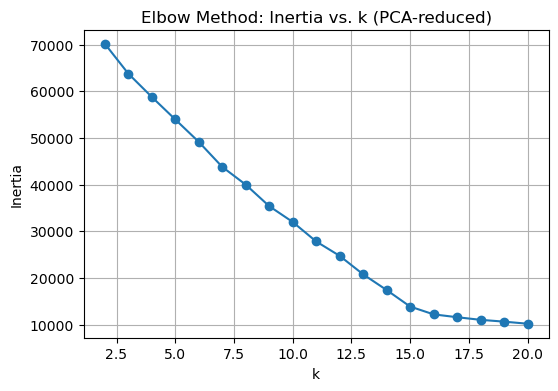

In [855]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# ASSUMPTION:
#   You already have a DataFrame named `df_users_full`
#   with one row per user, and all columns except 
#   'user_id', 'persona_id', 'is_mixed' are numeric features.
# ----------------------------------------------------------

# 1. Extract feature columns (everything except metadata)
feature_cols = [c for c in df_users_full.columns if c not in ('user_id', 'persona_id', 'is_mixed')]
X_raw = df_users_full[feature_cols].values

# 2. Standardize features to zero mean, unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# 3. PCA to retain 95% of variance
pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

# Report how many components were kept
n_components_retained = X_pca.shape[1]
explained_variance = pca.explained_variance_ratio_.cumsum()[-1]
print(f"PCA reduced to {n_components_retained} components, explaining {explained_variance:.3f} of variance")

# 4. Use X_pca to re-evaluate k from 2 to 20
ks = range(2, 21)
inertias = []
sil_scores = []
ch_scores = []
db_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5).fit(X_pca)
    labels = kmeans.labels_
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))
    ch_scores.append(calinski_harabasz_score(X_pca, labels))
    db_scores.append(davies_bouldin_score(X_pca, labels))

# 5. Plot metrics

plt.figure(figsize=(6, 4))
plt.plot(list(ks), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia vs. k (PCA-reduced)')
plt.grid(True)
plt.show()

# plt.figure(figsize=(6, 4))
# plt.plot(list(ks), sil_scores, marker='o')
# plt.xlabel('k')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Analysis (PCA-reduced)')
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(6, 4))
# plt.plot(list(ks), ch_scores, marker='o')
# plt.xlabel('k')
# plt.ylabel('Calinski-Harabasz Score')
# plt.title('Calinski-Harabasz Analysis (PCA-reduced)')
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(6, 4))
# plt.plot(list(ks), db_scores, marker='o')
# plt.xlabel('k')
# plt.ylabel('Davies-Bouldin Score')
# plt.title('Davies-Bouldin Analysis (PCA-reduced)')
# plt.grid(True)
# plt.show()



In [856]:
# lets take k = 15 as per elbon method

In [857]:
X_pca.shape

(1570, 24)

In [858]:
df_users_full

,user_id,genre_frac_Action,genre_frac_Adventure,genre_frac_Animation,genre_frac_Comedy,genre_frac_Crime,genre_frac_Documentary,genre_frac_Drama,genre_frac_Family,genre_frac_Fantasy,...,country_USA,country_Canada,country_UK,country_Germany,country_France,country_Australia,country_Japan,country_India,persona_id,is_mixed
0,0,0.387097,0.048387,0.000000,0.016129,0.000000,0.016129,0.000000,0.016129,0.016129,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
1,1,0.350000,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
2,2,0.250000,0.027778,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
3,3,0.345455,0.036364,0.018182,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,False
4,4,0.343750,0.031250,0.015625,0.031250,0.015625,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1565,0.016667,0.033333,0.033333,0.016667,0.100000,0.033333,0.066667,0.033333,0.116667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1,False
1566,1566,0.042254,0.042254,0.070423,0.042254,0.028169,0.070423,0.042254,0.070423,0.098592,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,False
1567,1567,0.052632,0.052632,0.052632,0.078947,0.092105,0.026316,0.078947,0.052632,0.013158,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,False
1568,1568,0.056338,0.042254,0.042254,0.084507,0.070423,0.084507,0.028169,0.042254,0.028169,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,False


In [859]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# ----------------------------------------------------------
# ASSUMPTION:
#   `df_users_full` already exists with:
#   - columns: 
#       * "user_id", "persona_id", "is_mixed"
#       * feature columns: genre_frac_*, pct_scrolled, avg_rating, pct_rating5,
#                         app_*, month_*, weekday_*, "age", country_* 
# ----------------------------------------------------------

# 1. Identify feature columns (exclude metadata)
feature_cols = [c for c in df_users_full.columns if c not in ("user_id", "persona_id", "is_mixed")]

# 2. Standardize features
X_raw = df_users_full[feature_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# 3. PCA reduction (use same number of components as earlier, here assume 26 for 95%)
pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)
# (In case you already know 26, you can do PCA(n_components=26))

# 4. Fit KMeans with k=15 on PCA features
k = 15
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_pca)
df_users_full["pred_label"] = kmeans.labels_

# 5. Cluster summaries: compute mean of each original feature per predicted cluster
cluster_summary = df_users_full.groupby("pred_label")[feature_cols].mean()

# 6. For readability, pick top 3 genres, top 2 apps, average age, top country for each cluster
summaries = []
for label, row in cluster_summary.iterrows():
    # Extract top 3 genres
    genre_cols = [c for c in feature_cols if c.startswith("genre_frac_")]
    top_genres = row[genre_cols].sort_values(ascending=False).head(3).index.tolist()
    
    # Extract top 2 apps
    app_cols = [c for c in feature_cols if c.startswith("app_")]
    top_apps = row[app_cols].sort_values(ascending=False).head(2).index.tolist()
    
    # Average age
    avg_age = row["age"]
    
    # Top country
    country_cols = [c for c in feature_cols if c.startswith("country_")]
    top_country = row[country_cols].sort_values(ascending=False).head(1).index[0]
    
    summaries.append({
        "pred_label": label,
        "top_genres": top_genres,
        "top_apps": top_apps,
        "avg_age": avg_age,
        "top_country": top_country
    })

cluster_summaries_df = pd.DataFrame(summaries)

# 7. For pure users (is_mixed=False), compute ARI between true persona_id and pred_label
pure_users = df_users_full[df_users_full["is_mixed"] == False]
ari_score = adjusted_rand_score(pure_users["persona_id"], pure_users["pred_label"])

cluster_summaries_df, ari_score


(    pred_label                                         top_genres   
 0            0  [genre_frac_Documentary, genre_frac_War, genre...  \
 1            1  [genre_frac_Action, genre_frac_Thriller, genre...   
 2            2  [genre_frac_Mystery, genre_frac_Music, genre_f...   
 3            3  [genre_frac_Action, genre_frac_Animation, genr...   
 4            4  [genre_frac_Comedy, genre_frac_War, genre_frac...   
 5            5  [genre_frac_Family, genre_frac_Crime, genre_fr...   
 6            6  [genre_frac_Drama, genre_frac_TVMovie, genre_f...   
 7            7  [genre_frac_Romance, genre_frac_Mystery, genre...   
 8            8  [genre_frac_Crime, genre_frac_Documentary, gen...   
 9            9  [genre_frac_Drama, genre_frac_Thriller, genre_...   
 10          10  [genre_frac_Fantasy, genre_frac_Romance, genre...   
 11          11  [genre_frac_Family, genre_frac_Thriller, genre...   
 12          12  [genre_frac_Comedy, genre_frac_Crime, genre_fr...   
 13          13  [ge

In [860]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

# -----------------------------------------------------------------------------
# ASSUMPTION: 
#   You already have a DataFrame named `df_users_full` with exactly these columns:
#     - "user_id", "persona_id", "is_mixed"
#     - A set of numeric feature columns (56 dimensions), named something like:
#         genre_frac_<genre1>, genre_frac_<genre2>, … (all your genre fractions)
#         pct_scrolled, avg_rating, pct_rating5
#         app_<netflix>, app_<amazon_prime>, app_<disney_plus>, app_<hulu>
#         month_<1>, month_<2>, …, month_<12>
#         weekday_<0>, …, weekday_<6>
#         age
#         country_<USA>, country_<India>, country_<UK>, country_<Canada>, country_<Australia>
#
#   (If your column names differ slightly, just adjust the string prefixes below.)
# -----------------------------------------------------------------------------

# 1) Extract all “true” feature columns (exclude metadata)
feature_cols = [
    c for c in df_users_full.columns 
    if c not in ("user_id", "persona_id", "is_mixed")
]
X_raw = df_users_full[feature_cols].values

# 2) Standardize each feature to zero mean / unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# 3) Run PCA to preserve 95% of the variance
pca = PCA(n_components=0.95, svd_solver="full")
X_pca = pca.fit_transform(X_scaled)

n_components_retained = X_pca.shape[1]
explained_var = pca.explained_variance_ratio_.cumsum()[-1]
print(f"PCA reduced from {X_raw.shape[1]} dims → {n_components_retained} components, "
      f"explaining {explained_var:.3f} of variance.")

# 4) Fit k‐Means with k=15 on the PCA‐reduced data
k = 15
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_pca)
df_users_full["pred_label"] = kmeans.labels_

# 5) Summarize each predicted cluster (15 total) by taking the mean of each original feature
cluster_summary = (
    df_users_full
    .groupby("pred_label")[feature_cols]
    .mean()
)

# 6) For readability, build a small “top‐N” summary for each cluster:
#    - Top 3 genres (highest genre_frac_* means)
#    - Top 2 apps   (highest app_* means)
#    - Average age
#    - Top country  (highest country_* means)
summaries = []
for label, row in cluster_summary.iterrows():
    # (a) Top 3 genres
    genre_cols = [c for c in feature_cols if c.startswith("genre_frac_")]
    top_genres = (
        row[genre_cols]
        .sort_values(ascending=False)
        .head(3)
        .index
        .tolist()
    )
    
    # (b) Top 2 apps
    app_cols = [c for c in feature_cols if c.startswith("app_")]
    top_apps = (
        row[app_cols]
        .sort_values(ascending=False)
        .head(2)
        .index
        .tolist()
    )
    
    # (c) Average age
    avg_age = float(row["age"])
    
    # (d) Top country
    country_cols = [c for c in feature_cols if c.startswith("country_")]
    top_country = row[country_cols].sort_values(ascending=False).index[0]
    
    summaries.append({
        "pred_label": label,
        "top_genres": top_genres,
        "top_apps": top_apps,
        "avg_age": round(avg_age, 1),
        "top_country": top_country
    })

cluster_summaries_df = pd.DataFrame(summaries).sort_values("pred_label")

# 7) Print out the 15 cluster summaries
print("\n===== Cluster Summaries for k=15 =====")
display(cluster_summaries_df)

# 8) Compare predicted labels to “true” persona_id for pure users alone
pure_mask = df_users_full["is_mixed"] == False
pure_true = df_users_full.loc[pure_mask, "persona_id"].values
pure_pred = df_users_full.loc[pure_mask, "pred_label"].values

ari_score = adjusted_rand_score(pure_true, pure_pred)
print(f"\nAdjusted Rand Index on pure users: {ari_score:.3f} "
      f"(1.0 = perfect agreement)")

# 9) OPTIONAL: Show how many pure users were assigned to their exact persona
#    (i.e. “accuracy” on non‐mixed subset, if persona_id ∈ [0..14])
correct_assignments = np.sum(pure_true == pure_pred)
total_pure = pure_true.shape[0]
accuracy_pure = correct_assignments / total_pure
print(f"Pure‐user “accuracy” (persona_id == pred_label): {accuracy_pure:.3%} "
      f"({correct_assignments}/{total_pure})")


PCA reduced from 57 dims → 24 components, explaining 0.951 of variance.

===== Cluster Summaries for k=15 =====


,pred_label,top_genres,top_apps,avg_age,top_country
0,0,"[genre_frac_Action, genre_frac_Thriller, genre...","[app_amazon_prime, app_hbo_max]",20.6,country_Japan
1,1,"[genre_frac_Family, genre_frac_Crime, genre_fr...","[app_amazon_prime, app_hulu]",39.5,country_France
2,2,"[genre_frac_Comedy, genre_frac_Crime, genre_fr...","[app_hbo_max, app_amazon_prime]",30.3,country_Canada
3,3,"[genre_frac_Family, genre_frac_Thriller, genre...","[app_hbo_max, app_disney_plus]",36.5,country_USA
4,4,"[genre_frac_Action, genre_frac_Documentary, ge...","[app_netflix, app_disney_plus]",28.5,country_UK
5,5,"[genre_frac_Mystery, genre_frac_Music, genre_f...","[app_hulu, app_disney_plus]",32.4,country_USA
6,6,"[genre_frac_Fantasy, genre_frac_Romance, genre...","[app_hbo_max, app_netflix]",44.4,country_Canada
7,7,"[genre_frac_Action, genre_frac_Animation, genr...","[app_netflix, app_amazon_prime]",24.4,country_Canada
8,8,"[genre_frac_Romance, genre_frac_Mystery, genre...","[app_amazon_prime, app_hulu]",48.5,country_Japan
9,9,"[genre_frac_Crime, genre_frac_Documentary, gen...","[app_hulu, app_netflix]",22.4,country_India



Adjusted Rand Index on pure users: 0.966 (1.0 = perfect agreement)
Pure‐user “accuracy” (persona_id == pred_label): 19.355% (300/1550)


In [ ]:
#import pickle

In [275]:
#pickle.dump(new_df, open('movies.pkl','wb'))

In [276]:
#new_df

In [277]:
#new_df['title'].values

In [271]:
#problem with list, we will send a dictionary
#pickle.dump(new_df.to_dict(),open('movie_dict.pkl', 'wb'))

In [272]:
#pickle.dump(similarity,open('similarity.pkl','wb'))